## Question
Lift = 75 mm at 180 degrees. From SoM, $\epsilon_\text{max}=25 mm$ $\rho_\text{min} = 60 mm$

## Major Formulae for flat face Cam follower
1. $r_b \ge \rho_\text{min} - \left[y\left(\theta\right) + {y}"\left(\theta\right) \right]_\text{min},\, \theta \in \left[0, \theta_{r_i}\right]$
2. $e \ge \left[y'\left(\theta\right)\right]_\text{max} - \epsilon_\text{max}, \, \theta \in \left[0, \theta_{r_i}\right]$
3. $w_\text{follower, min} = y'(\theta)_\text{max} + \left|y'(\theta)_\text{min}\right|$

In [20]:
import numpy as np
import sympy as sp
import scipy
import matplotlib.pyplot as plt

In [21]:
# Plotting y(theta)
t = sp.symbols("t")
theta = sp.Function("theta")(t)
y = sp.Function("y")(theta)

In [ ]:
# For cycloidal,
THETA_RI = np.pi
OMEGA = 1
ALPHA = 0
L = 75
y = L*(theta/THETA_RI - sp.sin(2*np.pi*theta/THETA_RI)/(2*np.pi))

# Enter your own function here instead

dashy = sp.diff(y,theta).subs({sp.diff(theta,t):OMEGA, sp.diff(theta,t,t):ALPHA}).evalf()
ddashy = sp.diff(dashy, theta).subs(
    {sp.diff(theta, theta): OMEGA, sp.diff(theta, t, t): ALPHA}).evalf()
y_lambda = sp.lambdify(expr = y,args=theta, modules='numpy')
dashy_lambda = sp.lambdify(expr = dashy, args = theta, modules = 'numpy')
ddashy_lambda = sp.lambdify(expr = ddashy, args = theta, modules = 'numpy')

In [23]:
theta_val = np.linspace(0,np.pi,100)
dashy_val = dashy_lambda(theta_val)
ddashy_val = ddashy_lambda(theta_val)
y_val = y_lambda(theta_val)

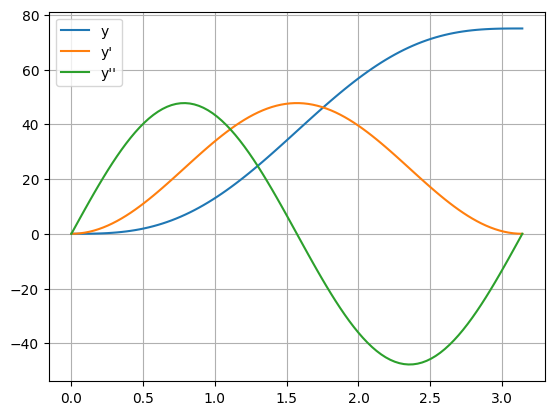

In [24]:
plt.plot(theta_val,y_val, label = 'y')
plt.plot(theta_val,dashy_val, label = 'y\'')
plt.plot(theta_val,ddashy_val, label = 'y\'\'')
plt.grid()
plt.legend()

In [25]:
yddashy_min = scipy.optimize.minimize(
    sp.lambdify(expr = y + ddashy, args=theta, modules='numpy'),
    x0=1.5,
    bounds=[(0, np.pi)])
RHO_MIN = 60
rb_min = RHO_MIN - yddashy_min.fun


dashy_max = scipy.optimize.minimize(
    sp.lambdify(expr = -dashy, args = theta, modules = 'numpy'),
    x0 = 1.5,
    bounds = [(0, np.pi)])
ECCENTRICITY_MAX = 25
dashy_max_val = -dashy_max.fun
e_min = dashy_max_val - ECCENTRICITY_MAX

dashy_min = scipy.optimize.minimize(
    sp.lambdify(expr=dashy, args=theta, modules='numpy'),
    x0=1.5,
    bounds=[(0, 2*np.pi)])

w_follower_min = dashy_max.fun + abs(dashy_min.fun)

In [26]:
# generating the Cam profile function
rb = rb_min
Y_c = rb+y
X_c = dashy
r_c = sp.sqrt(X_c**2 + Y_c**2)
eta_c = theta+sp.atan(X_c/Y_c)

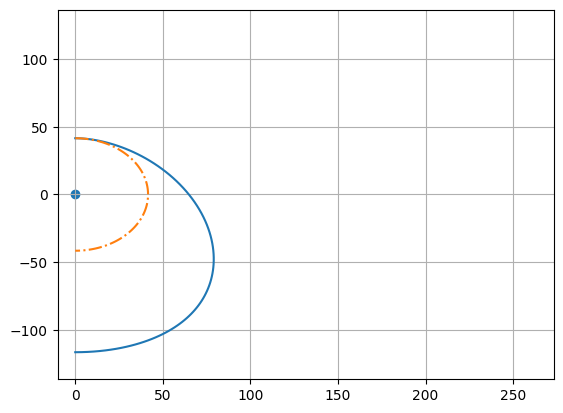

In [27]:
# Plotting the profile
rc_lambda = sp.lambdify(expr = r_c, args = theta, modules='numpy')
etac_lambda = sp.lambdify(expr = eta_c, args = theta, modules='numpy')

rc_val = rc_lambda(theta_val)
etac_val = etac_lambda(theta_val)
# plt.plot(rc_val, (etac_val))
x_cam, y_cam = rc_val*np.cos(etac_val), rc_val*np.sin(etac_val)
plt.plot(y_cam, x_cam)
xb = rb*np.cos(theta_val)
yb = rb*np.sin(theta_val)
plt.plot(yb, xb, ls = "-.")
plt.scatter(0,0)
plt.xlim((-10,2*( L+rb+20)))
plt.ylim(-(L+rb+20), L+rb+20)
plt.grid()

In [28]:
# Yc_max, and Xc_max, Xc_min

# Yc_max = rb+y_max_val
y_max = scipy.optimize.minimize(
    sp.lambdify(expr = -y, args = theta, modules = 'numpy'),
    x0 = 1.5,
    bounds = [(0, np.pi)])
y_max_val = -y_max.fun

Yc_max = rb+y_max_val
Xc_max = dashy_max_val
Xc_min = dashy_min.fun

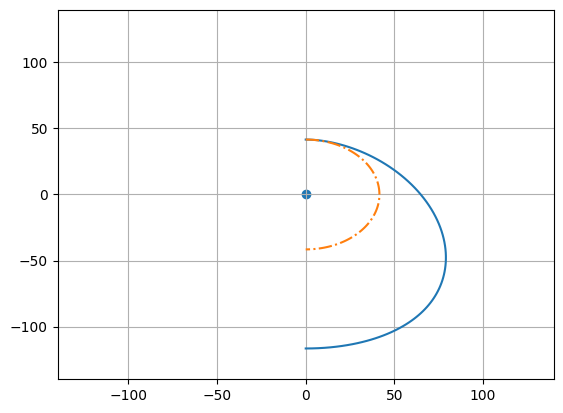

In [29]:
# use the above limits for a proper plotting
abs_lim = 1.2*max(Xc_max, abs(Xc_min), Yc_max)
plt.plot(y_cam, x_cam)
plt.plot(yb, xb, ls="-.")
plt.scatter(0, 0)
plt.xlim(-abs_lim, abs_lim)
plt.ylim(-abs_lim, abs_lim)
plt.grid()

In [ ]:
y_f = 5
dotyf = sp.diff(y_f, t).subs(
    {sp.diff(theta, t): OMEGA}
).evalf()

ddotyf = sp.diff(y_f, t, t).subs(
    {sp.diff(theta, t): OMEGA,
     sp.diff(theta, t, t): ALPHA}
).evalf()

y_lambda = sp.lambdify(
    expr=y_f,
    args=theta,
    modules='numpy'
)
dotyf_lambda = sp.lambdify(
    expr=dotyf,
    args=theta,
    modules='numpy'
)
ddotyf_lambda = sp.lambdify(
    expr=ddotyf,
    args=theta,
    modules='numpy'
)